##  ANNOY (Approximate Nearest Neighbour O Yeah)

Brute force - finding the closest K nearest neighbours to a query point
is O(N) - where N is no of points. More precisely O(D * N) if each point has a dimension D

But it is the most precise method !!

Other methods like LSH, FAISS, ANNOY are faster, but more approximate

We already saw LSH is O(D * log(N))

ANNOY is actually very similar to LSH, same O(D* log N) complexity,  also uses hyperplanes , but the details differ

## Details

1) Given a set of N points, here's how the algo works
2) pick two points randomly, draw a plane exactly between the two points
3) In each of the two halves thus created, repeat steps 2 and 3

4) Store this whole operation as a tree
That's it !!
Stop when each section of the space has at most 3 points or something

4) When a query point comes in, traverse the binary tree to find the leaf section into which this point should be. Then within the leaf section, compute usual distance between query point and all the leaf section points

## Example

1) Given all these points in a 2-D plane, none of the lines (hyperplanes initially exist)

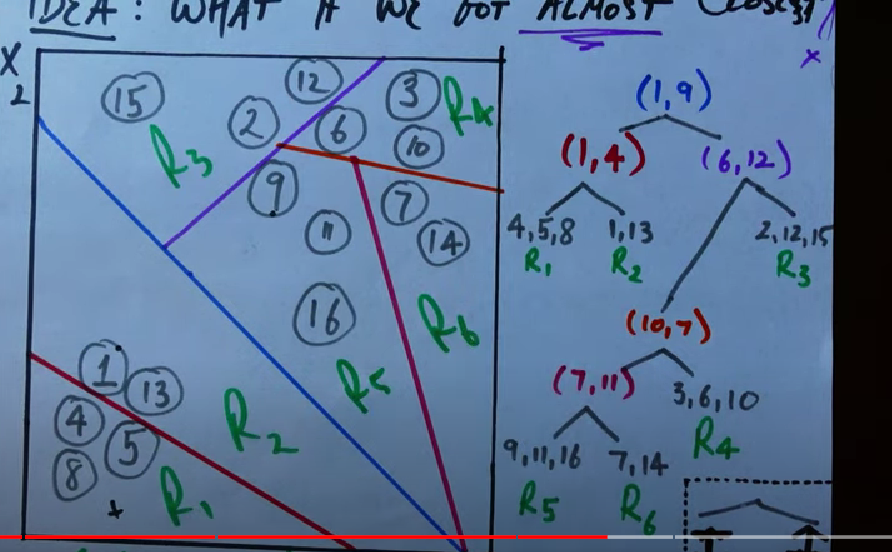

2) You want to construct the tree on the right
3) First pick two points randomly from the points - 1,9 - This forms root of tree
4) Draw a hyperplane exactly in the middle of 1,9 - The blue line, which divides the space into two parts
5) Convention - area below a plane is to left of tree, area above a plane is to right
6) In the bottom part, pick two points randomly - you get 1,4 (note - you don't necessarily need an overlap with the earlier choice, here it so happened that 1 got picked)
7) Draw a hyperplane exactly in middle of 1,4. (The red line)
8) Now you end this part of the tree, as you have at most 3 points in both the segments below and above the red line - R1 and R2
9) Going back to point 4, and taking the area above the plane, repeat same process

That's it - capture this information in the tree to the right

If you get a new query point
1) Start at root of tree, check if it is above or below the first plane. If below, go left, if above, go right
2) Repeat till you reach a leaf
3) Let's assume the point lands in segment R1.
4) Now , within R1, find the regular KNN distance between query points and all points in R1


Similar to LSH, you can repeat this same process L times to create a forest to get more confidence


## Order complexity

1) This is O(log N) as its kind of a binary tree, and each plane splits the hyperspace into two halves

## References

1) https://www.youtube.com/watch?v=DRbjpuqOsjk - great youtube explanation
2) https://erikbern.com/2015/10/01/nearest-neighbors-and-vector-models-part-2-how-to-search-in-high-dimensional-spaces.html - Original article by inventor